In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter
import re
import nltk
nltk.download('stopwords');
import time
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import collections
from numpy import linalg as la
import string
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xoelr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data collection

In [2]:
access_token1 = "627332306-KjsHQhqYB1I0hme1P8IFo3hJGkJLpKniaCHRtmeO"
access_token_secret1 = "RPZG7VZjhuR7f01j7ProhNhFxeShZJ45IIrs4B191l8x9"

consumer_key1 = "fhjwygGGDVXcRhLtJCaKifHuN"
consumer_secret1 = "mlC845l2DSkMnNLD7maiOYAVoIz1yqDSdTD7aaA5dtRknYcQFQ"

In [3]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
import json
import datetime
from queue import Queue
from threading import Thread

In [4]:
auth = OAuthHandler(consumer_key1, consumer_secret1)
auth.set_access_token(access_token1, access_token_secret1)
api = API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
class MyStreamListener(StreamListener):
    """
    Twitter listener, collects streaming tweets and output to a file
    """
    def __init__(self, api, OUTPUT_FILENAME, stop_condition=10):
        """
        initialize the stream, with num. of tweets and saving the outputfile
        """
        # this line is needed to import the characteristics of the streaming API
        super(MyStreamListener, self).__init__()
        
        # to-count the number of tweets collected        
        self.num_tweets = 0
        #Store into a list because of disconnection of the API
        self.tweets = []
        # save filename
        self.filename = OUTPUT_FILENAME
        
        # stop-condition
        self.stop_condition = stop_condition
        

    def on_status(self, status):
        
        """
        this function runs each time a new bunch of tweets is retrived from the streaming
        """
        self.tweets.append(status._json)
        
        # Stop condition        
        if self.num_tweets <= self.stop_condition:
            return True
        else:
            return False
        self.num_tweets += 1
        

    def on_error(self, status):
        """
        function useful to handle errors. It's possible to personalize it 
        depending on the way we want to handle errors
        """
        
        print(status)
        #returning False in on_error disconnects the stream
        return False

In [7]:
%%time

OUTPUT_FILENAME = "tweets.json"
#We collected the tweets in 2 times
stop_condition = 50000

l = MyStreamListener(api, OUTPUT_FILENAME, stop_condition)
# here we recall the Stream Class from Tweepy to input the authentication info and our personalized listener 
stream = Stream(auth=api.auth, listener=l)


# keywords we decided to track 
TRACKING_KEYWORDS = ['COVID-19', 'COVID', 'CORONAVIRUS', 'PANDEMIC']
stream.filter(
    track=TRACKING_KEYWORDS, 
    is_async=False, 
    languages=['en']
)

{'created_at': 'Fri Dec 04 18:42:39 +0000 2020', 'id': 1334931136867414016, 'id_str': '1334931136867414016', 'text': 'RT @newsmax: Three ex-Presidents, including a Republican, say they would take COVID vaccine on camera to encourage others https://t.co/il6Q…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1197617721783046144, 'id_str': '1197617721783046144', 'name': 'D xu', 'screen_name': 'Dxu28700173', 'location': 'Nederland', 'url': None, 'description': '清醒了的跪👻族', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 116, 'friends_count': 241, 'listed_count': 0, 'favourites_count': 49119, 'statuses_count': 22233, 'created_at': 'Thu Nov 21 20:48:29 +0000 2019', 'utc_offset': None, 'time_zone': None, 'geo_enable

{'created_at': 'Fri Dec 04 18:42:39 +0000 2020', 'id': 1334931137186197507, 'id_str': '1334931137186197507', 'text': 'Anti maskers ain’t worried about something they already got 🤷🏻\u200d♂️', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 265196737, 'id_str': '265196737', 'name': 'thadius', 'screen_name': 'gospiz', 'location': None, 'url': None, 'description': 'Last time I checked I wasn’t a Russian bot. 🇺🇸🇳🇿🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f #TrumpIsASatyr #TedCruzIsABlobfish Venmo: @gospizzy', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 314, 'friends_count': 1845, 'listed_count': 0, 'favourites_count': 5397, 'statuses_count': 4213, 'created_at': 'Sun Mar 13 04:58:14 +0000 2011'

{'created_at': 'Fri Dec 04 18:42:39 +0000 2020', 'id': 1334931137366470660, 'id_str': '1334931137366470660', 'text': 'RT @RepMichaelWaltz: There you have it. \n\nNancy Pelosi just admitted she refused to negotiate bipartisan COVID relief for MONTHS just to sc…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 95744025, 'id_str': '95744025', 'name': 'G Susan McMury Lang', 'screen_name': 'gsmclang', 'location': 'Mandeville, LA', 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 20, 'friends_count': 163, 'listed_count': 0, 'favourites_count': 14428, 'statuses_count': 4105, 'created_at': 'Wed Dec 09 22:07:47 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, '

{'created_at': 'Fri Dec 04 18:42:39 +0000 2020', 'id': 1334931137794281472, 'id_str': '1334931137794281472', 'text': 'Can you say B***H!!!', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3482687782, 'id_str': '3482687782', 'name': 'Apollo', 'screen_name': 'eaglemoonlander', 'location': None, 'url': None, 'description': 'PRO: 1st & 2nd Amendments, Christian, Life, Flag, Military, Law Enforcement, Israel, Trump/Pence 2020, Country Music, Show Me State, history buff, America First', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 86, 'friends_count': 713, 'listed_count': 0, 'favourites_count': 23, 'statuses_count': 5999, 'created_at': 'Sat Aug 29 17:50:25 +0000 2015', 'utc_offset': None, 'time_zone': None, 'geo_enabled': 

{'created_at': 'Fri Dec 04 18:42:40 +0000 2020', 'id': 1334931139979522049, 'id_str': '1334931139979522049', 'text': 'RT @3days3nights: If HRC won, this was their depopulation plan during her 8 years to usher in their fake AC. \n\n2017 &gt; NK, RACE WARS\n2018 &gt;…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2161170747, 'id_str': '2161170747', 'name': 'GatorBIZ', 'screen_name': 'tyler_ley', 'location': 'Florida, USA', 'url': None, 'description': '🇺🇸Proud Husband, ✝️Father & 🐊Friend... ⚔️ Keep ur guns...‼️keep ur freedom‼️ #VoteRed, #Familyiseverything, #MAGA, #Patriot, 🇺🇸#2AStrong🇺🇸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 17178, 'friends_count': 17367, 'listed_count': 2, 'favourites_count': 664, 'statuse

{'created_at': 'Fri Dec 04 18:42:40 +0000 2020', 'id': 1334931141393047552, 'id_str': '1334931141393047552', 'text': 'RT @yashar: This pandemic has been raging for 268 days\n\nCongress could pass a stand alone bill getting every American a check in one day\n\nI…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 24386853, 'id_str': '24386853', 'name': 'Ian', 'screen_name': 'IanLysaght', 'location': None, 'url': 'https://www.google.com/search?q=confirmation+bias&ie=UTF-8&oe=UTF-8&hl=en-us&client=safari', 'description': 'Liverpool FC. Denver. Once described as congenial PSN: IanMack93LFC ( I will DESTROY YOU IN FIFA)  https://twitter.com/rodger/status/1191542644599443456?s=21', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count'

{'created_at': 'Fri Dec 04 18:42:40 +0000 2020', 'id': 1334931141837664257, 'id_str': '1334931141837664257', 'text': 'RT @z3r0trust: The reality for many parents during the pandemic... https://t.co/TNI4PEryhc', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 468922368, 'id_str': '468922368', 'name': 'Kitty Hegemon', 'screen_name': 'NianaSavage', 'location': 'in my head beating myself up for not working harder', 'url': None, 'description': 'aka Nina Kollars military innov & cyber nerd....budding hacker. Prof @ Naval War College...Certified Bourbon Steward...I gave a talk once about coffee and fraud', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 4954, 'friends_count': 3002, 'listed_count': 68, 'favourites_count': 8211, 

{'created_at': 'Fri Dec 04 18:42:40 +0000 2020', 'id': 1334931142143844353, 'id_str': '1334931142143844353', 'text': 'RT @jaboukie: the fact she was alive to know edward and then also see his biopic omg....', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 872115850609930240, 'id_str': '872115850609930240', 'name': 'Mr. -1', 'screen_name': 'Santana_Clause', 'location': 'United Kingdom', 'url': None, 'description': 'NEW CHANNEL \nhttp://youtube.com/channel/UCAFJI…\nOLD CHANNEL\nhttp://youtube.com/channel/UCxpy1…', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 39, 'friends_count': 221, 'listed_count': 0, 'favourites_count': 42019, 'statuses_count': 5676, 'created_at': 'Tue Jun 06 15:39:56 +0000 2017', 'utc_o

{'created_at': 'Fri Dec 04 18:42:41 +0000 2020', 'id': 1334931143771049986, 'id_str': '1334931143771049986', 'text': 'RT @AOC: COVID relief needs to directly help everyday people.\n\nPeople need stimulus checks &amp; UI.', 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 911824860774416385, 'id_str': '911824860774416385', 'name': 'Linda', 'screen_name': 'linda91711', 'location': 'Apple Valley, CA', 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 24, 'friends_count': 52, 'listed_count': 0, 'favourites_count': 5515, 'statuses_count': 9969, 'created_at': 'Sun Sep 24 05:29:22 +0000 2017', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enable

{'created_at': 'Fri Dec 04 18:42:41 +0000 2020', 'id': 1334931145151156225, 'id_str': '1334931145151156225', 'text': 'RT @mrjasonowilson: Our children cannot process the stress that COVID has caused in their lives and yelling at them only makes it worse. A…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1553917502, 'id_str': '1553917502', 'name': 'A Raw & Raggedy Bitch', 'screen_name': 'LeedvsLydia', 'location': None, 'url': None, 'description': 'If I die, please remember for the raggedy bitch that I am/was/will forever be vir-fucking-go', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 868, 'friends_count': 1041, 'listed_count': 2, 'favourites_count': 115377, 'statuses_count': 43919, 'created_at': 'Fri Jun

{'created_at': 'Fri Dec 04 18:42:41 +0000 2020', 'id': 1334931146950529025, 'id_str': '1334931146950529025', 'text': "RT @RepPressley: A COVID relief bill that doesn't include:\n\n❌ enhanced UI benefits\n❌ workplace protections\n❌ paid sick leave\n❌ direct cash…", 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 7413852, 'id_str': '7413852', 'name': 'Pamela G. Mullins \U0001fa78\U0001f9b7⚔️\U0001f9fb😷BLM‼️', 'screen_name': 'IronyFlows', 'location': 'North Carolina, USA', 'url': 'https://amzn.to/3eHZbGx', 'description': 'Searching for the next questions to ask. http://pamelamullins.com http://meanderings.me', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 529, 'friends_count': 506, 'listed_count': 37, 'favourites_count': 

{'created_at': 'Fri Dec 04 18:42:42 +0000 2020', 'id': 1334931150309974016, 'id_str': '1334931150309974016', 'text': 'RT @BrianTh37895972: Every single idiot who vote for Pelosi &amp; the Democrats in this past election just now realizing it was Pelosi blocking…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1312063802142339073, 'id_str': '1312063802142339073', 'name': "Good'n Ready", 'screen_name': 'TWorldIWatching', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 41, 'friends_count': 433, 'listed_count': 0, 'favourites_count': 2920, 'statuses_count': 3305, 'created_at': 'Fri Oct 02 16:16:27 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_enabl

{'created_at': 'Fri Dec 04 18:42:43 +0000 2020', 'id': 1334931153103548416, 'id_str': '1334931153103548416', 'text': 'RT @MotherJones: "The virus isn\'t noctural": The folly of COVID curfews https://t.co/PSUxJSR3lD', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1295539425452208129, 'id_str': '1295539425452208129', 'name': 'We Are Counting on Georgia on January 5, 2021!', 'screen_name': 'Proud2020D', 'location': 'Illinois', 'url': None, 'description': "I'm a believer...and a happy woman.", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 63, 'friends_count': 239, 'listed_count': 0, 'favourites_count': 33501, 'statuses_count': 23766, 'created_at': 'Tue Aug 18 01:54:27 +0000 2020', 'utc_offset': None, 'time_zone': None, '

{'created_at': 'Fri Dec 04 18:42:43 +0000 2020', 'id': 1334931153782882304, 'id_str': '1334931153782882304', 'text': 'RT @democracynow: California Farmworkers Infected by Coronavirus at Three Times the Rate of Other Workers https://t.co/0xS96HM0Mk', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 432164100, 'id_str': '432164100', 'name': 'J. Duran', 'screen_name': 'JavierduranEl', 'location': 'Tuc-Sonora, Arizona', 'url': None, 'description': 'Director Confluencenter for Creative Inquiry. University of Arizona. \nAll Tweets are my own- RTs are not necessarily endorsements.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 330, 'friends_count': 453, 'listed_count': 22, 'favourites_count': 25285, 'statuses_cou

{'created_at': 'Fri Dec 04 18:42:44 +0000 2020', 'id': 1334931155972464641, 'id_str': '1334931155972464641', 'text': 'RT @TheKitchenista: Pandemic stress is weird because you can be super productive for weeks and then out of nowhere your brain is like wait,…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2823943259, 'id_str': '2823943259', 'name': 'aftermidnightBlue', 'screen_name': 'aftrmdnghtblue', 'location': 'New York', 'url': 'http://instagram.com/aftermidnightblue', 'description': 'Downtown📍26 Jefferson St, LES 🦈\U0001f9e1☕🏁📈 https://www.instagram.com/downtownsofamerica/ #BlackOwned', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 468, 'friends_count': 367, 'listed_count': 4, 'favourites_count': 1212

{'created_at': 'Fri Dec 04 18:42:44 +0000 2020', 'id': 1334931158036082688, 'id_str': '1334931158036082688', 'text': "@maddogpac I have to. Facility policy. I'd be stupid to expose myself or one of my compromised patients. (When I'm… https://t.co/xXsNnVBBEU", 'display_text_range': [11, 140], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': True, 'in_reply_to_status_id': 1334927232209391620, 'in_reply_to_status_id_str': '1334927232209391620', 'in_reply_to_user_id': 946199776412033025, 'in_reply_to_user_id_str': '946199776412033025', 'in_reply_to_screen_name': 'maddogpac', 'user': {'id': 72406471, 'id_str': '72406471', 'name': 'cheryl', 'screen_name': 'LostTheCoinToss', 'location': None, 'url': None, 'description': 'If you lead with "Christian" or "Conservative", you\'re already handicapped. Not a believer of fables.  Despise tRump.  #NotMyPresident #TheResistance', 'translator_type': 'none', 'protected': False, 'verified': False, 'followe

{'created_at': 'Fri Dec 04 18:42:44 +0000 2020', 'id': 1334931158455422979, 'id_str': '1334931158455422979', 'text': 'RT @onyxaminedlife: Replacing the words "the economy" with "rich people\'s yacht money"\n\n-How can we respond to COVID without sacrificing ri…', 'source': '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 891750901, 'id_str': '891750901', 'name': 'S.J. Barlament', 'screen_name': 'sj_barlament', 'location': None, 'url': None, 'description': 'Hmmm.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 382, 'friends_count': 692, 'listed_count': 27, 'favourites_count': 1358, 'statuses_count': 48021, 'created_at': 'Fri Oct 19 20:12:25 +0000 2012', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, '

{'created_at': 'Fri Dec 04 18:42:45 +0000 2020', 'id': 1334931159956897793, 'id_str': '1334931159956897793', 'text': 'RT @LLinWood: Political tweets for @KLoeffler is not where @BrianKempGA should be spending time today.\n\nKemp needs to immediately order spe…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 823096215675899904, 'id_str': '823096215675899904', 'name': 'President-Elect Spicy 🇺🇸 #StopTheSteal', 'screen_name': 'spicysaurus5', 'location': None, 'url': None, 'description': 'ΜΟΛΩΝ ΛΑΒΕ! #ReleaseTheKraken, #BoycottNFL, #NeverBendTheKnee, #TRUMP2020, #MAGA, #BackTheBlue, #AMERICAFIRST #1A #2A #VETERANS #PATRIOT #CONSTITUTION', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 12821, 'friends_count': 12748, 'listed

{'created_at': 'Fri Dec 04 18:42:45 +0000 2020', 'id': 1334931160808345600, 'id_str': '1334931160808345600', 'text': 'More important to the #Dems to keep the public high and unaware of their dark agenda than to provide relief to Amer… https://t.co/6PUl9vrHpd', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1294319847770222594, 'id_str': '1294319847770222594', 'name': '17Cookies', 'screen_name': '17Cookies2', 'location': None, 'url': None, 'description': 'Having none of it.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 89, 'friends_count': 494, 'listed_count': 0, 'favourites_count': 2873, 'statuses_count': 2070, 'created_at': 'Fri Aug 14 17:08:07 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False

{'created_at': 'Fri Dec 04 18:42:45 +0000 2020', 'id': 1334931162372849665, 'id_str': '1334931162372849665', 'text': "RT @RepJayapal: Yesterday's devastating new unemployment numbers, today's dismal job numbers, and our record number of COVID cases only hig…", 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15870659, 'id_str': '15870659', 'name': 'Wear a mask 😷 / Support Ossof & Warnock 🗣', 'screen_name': 'pebblesj21', 'location': 'United States', 'url': None, 'description': 'VOLUNTEER TODAY for Jon Ossof & Rev. Warnock: http://ElectJon.com | http://WarnockForGeorgia.com | http://GASenate.com | http://Fairfight.com/join-our-fight/', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3205, 'friends_count': 3328, 'listed_coun

{'created_at': 'Fri Dec 04 18:42:46 +0000 2020', 'id': 1334931165090697216, 'id_str': '1334931165090697216', 'text': "@ronin1121 @MichaelBuckelew @weaverjacob49 @3CFilmReview The CDC never said N95 masks don't work. Their previous gu… https://t.co/D2R7ZZmcDE", 'display_text_range': [57, 140], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': True, 'in_reply_to_status_id': 1334928318437658626, 'in_reply_to_status_id_str': '1334928318437658626', 'in_reply_to_user_id': 384275903, 'in_reply_to_user_id_str': '384275903', 'in_reply_to_screen_name': 'ronin1121', 'user': {'id': 1286428103338627072, 'id_str': '1286428103338627072', 'name': 'kokoro ga itai', 'screen_name': 'knavesoverkings', 'location': None, 'url': None, 'description': 'sleep is for the weak', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 36, 'friends_count': 402, 'listed_count': 1, 'favourites_count': 7617, 'statuses_count': 271

{'created_at': 'Fri Dec 04 18:42:46 +0000 2020', 'id': 1334931168211374088, 'id_str': '1334931168211374088', 'text': 'RT @JoyAnnReid: This, at its very essence, including just the visual ... is the modern Republican Party.', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 761598467718324224, 'id_str': '761598467718324224', 'name': 'Richard', 'screen_name': 'RichBruce49', 'location': None, 'url': None, 'description': '? do you want to be on right side of history?or? DO YOU WANT TO BE ON THE RIGHT SIDE OF HUMANITY? HUMANITY!!!', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 187, 'friends_count': 1099, 'listed_count': 1, 'favourites_count': 30129, 'statuses_count': 5463, 'created_at': 'Fri Aug 05 16:23:19 +00

{'created_at': 'Fri Dec 04 18:42:48 +0000 2020', 'id': 1334931173978615809, 'id_str': '1334931173978615809', 'text': 'RT @wweisawesome123: Just over two weeks ago @ITVCentral put together a lovely story about me and how \nI met my lovely friend Shelagh. We t…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1277632692834762753, 'id_str': '1277632692834762753', 'name': 'Syed Makki Shah', 'screen_name': 'SyedMakkiShah6', 'location': 'Manchester, England', 'url': None, 'description': 'Dad | Barrister | Business | LFC لست امام عيني ولكنك كل ما أرى -أحمد شوقي', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 71, 'friends_count': 1261, 'listed_count': 0, 'favourites_count': 1085, 'statuses_count': 1523, 'created_at

{'created_at': 'Fri Dec 04 18:42:48 +0000 2020', 'id': 1334931175333249024, 'id_str': '1334931175333249024', 'text': 'RT @SteveGuest: Nancy Pelosi admits it was her “decision” to block coronavirus relief for months https://t.co/iHhVFTwrD1', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 76562823, 'id_str': '76562823', 'name': 'Ronald Bangma 🇺🇸', 'screen_name': 'kwrider', 'location': 'Kingman AZ.', 'url': None, 'description': 'Whats a Bio? you get who I am, your on Twitter, Real simple, I like Motorcycles, Guns, Fishing, hunting, camping, Amateur Radio KI7PHX,CCW,NRA,#MAGA2020.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 880, 'friends_count': 1149, 'listed_count': 4, 'favourites_count': 66324, 'statuse

{'created_at': 'Fri Dec 04 18:42:49 +0000 2020', 'id': 1334931178491678720, 'id_str': '1334931178491678720', 'text': "RT @jenhansen31: 50 percent positivity rate. That's 1 out of every 2 COVID-19 tests performed coming back positive.\n\nWay to go, @KimReynold…", 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 133914833, 'id_str': '133914833', 'name': 'Illinois', 'screen_name': 'zipillinois', 'location': None, 'url': None, 'description': 'Wife, mother, grandmother, Patriot. I cannot abide a liar.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 2695, 'friends_count': 1646, 'listed_count': 8, 'favourites_count': 523512, 'statuses_count': 230410, 'created_at': 'Sat Apr 17 00:17:35 +0000 2010', 'utc_offset': None, 'time_zon

{'created_at': 'Fri Dec 04 18:42:49 +0000 2020', 'id': 1334931180643377152, 'id_str': '1334931180643377152', 'text': 'RT @bretther: Covid or no covid, how am I the same species as people who go barefoot on flights', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 783052758, 'id_str': '783052758', 'name': 'Nick', 'screen_name': 'NickZararis', 'location': 'Land of hopes and dreams', 'url': 'https://gothamsn.com/@nickzararisjournalism', 'description': 'Rangers @Gothamsn|Writer @SBD| Producer and host of @UpperBowlGM|K.C|Founder McEichel bowl|Football guy|', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1931, 'friends_count': 1786, 'listed_count': 31, 'favourites_count': 449718, 'statuses_count': 155571, 'create

{'created_at': 'Fri Dec 04 18:42:50 +0000 2020', 'id': 1334931184808243206, 'id_str': '1334931184808243206', 'text': "It's almost as if anti-maskers are true life zombies.", 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 183135210, 'id_str': '183135210', 'name': 'Linda Neff', 'screen_name': 'bittymac', 'location': 'No Love Connections Here', 'url': None, 'description': 'Kindness is free, be generous. Be the voice for animals. Express thru art. Vote 🌊 Wear a mask you heathen! \n9.18.20 RBG Legend.Hero.Fearless.Warrior.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 2390, 'friends_count': 2569, 'listed_count': 3, 'favourites_count': 20648, 'statuses_count': 14742, 'created_at': 'Thu Aug 26 06:40:45 +0000 2010', 'utc_of

{'created_at': 'Fri Dec 04 18:42:51 +0000 2020', 'id': 1334931185542291458, 'id_str': '1334931185542291458', 'text': "RT @KashPrime: Nova Scotia is continuing to crush this pandemic.  They used rapid testing to quickly find and squelch flare-ups, now they'r…", 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 894009211, 'id_str': '894009211', 'name': 'Annie stz', 'screen_name': 'FeliniStz', 'location': None, 'url': None, 'description': 'Proud Canadian 🇨🇦Proud Maritimer\U0001f99e', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 115, 'friends_count': 864, 'listed_count': 0, 'favourites_count': 14231, 'statuses_count': 3224, 'created_at': 'Sat Oct 20 20:44:28 +0000 2012', 'utc_offset': None, 'time_zone': None, 'geo_enabled':

{'created_at': 'Fri Dec 04 18:42:51 +0000 2020', 'id': 1334931188662886406, 'id_str': '1334931188662886406', 'text': 'RT @BrianUFT: LONG OVERDUE: For the first time, CDC advises public to wear masks indoors when not home https://t.co/otBvTjeIB5 @UFT', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2998847207, 'id_str': '2998847207', 'name': 'Joanne B', 'screen_name': 'UFTBulla', 'location': None, 'url': None, 'description': 'NYC Public School Educator, Advocate.\n#UnionStrong and #PublicSchoolProud \nAll views shared are my own.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 315, 'friends_count': 762, 'listed_count': 11, 'favourites_count': 17010, 'statuses_count': 5104, 'created_at': 'Sun Jan 25 23:31:0

{'created_at': 'Fri Dec 04 18:42:52 +0000 2020', 'id': 1334931190709710854, 'id_str': '1334931190709710854', 'text': 'RT @PamBelluck: Long-term Covid symptoms "as real and possible as dying from the virus itself.” 1st federal workshop included powerful test…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15480566, 'id_str': '15480566', 'name': 'Diana Berrent', 'screen_name': 'dianaberrent', 'location': 'New York, NY', 'url': 'http://www.dianaberrent.com', 'description': 'Mom, New Yorker, Covid Disrupter.\nFounder of Survivor Corps.\n10/10 (x3) by Room Rater\nTweets are mine and mine alone.\nhttp://SurvivorCorps.com\nShe/Her', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 6120, 'friends_count': 2015, 'li

{'created_at': 'Fri Dec 04 18:42:52 +0000 2020', 'id': 1334931191888285696, 'id_str': '1334931191888285696', 'text': 'Fcuk off! I’m done!', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 883332504, 'id_str': '883332504', 'name': 'SADurbs', 'screen_name': 'DurbsSA', 'location': 'Umhlanga, South Africa', 'url': None, 'description': '✌️💕🙏for Mzansi my beautiful homeland 🇿🇦 TOGETHER we prosper ❤️', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 178, 'friends_count': 172, 'listed_count': 0, 'favourites_count': 11621, 'statuses_count': 4129, 'created_at': 'Mon Oct 15 23:41:36 +0000 2012', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False

{'created_at': 'Fri Dec 04 18:42:53 +0000 2020', 'id': 1334931195021430789, 'id_str': '1334931195021430789', 'text': 'RT @alphaman19681: @marceelias Democrats need to repeat this far and wide before the narrative changes Jan21 2021: “Trump and the complicit…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 271759339, 'id_str': '271759339', 'name': 'Michael Swartz', 'screen_name': 'Maswartz226', 'location': None, 'url': None, 'description': 'For at least a decade the GOP has proven themselves unable to place country before party. We do not need the GOP. Do NOT mistake my hatred of Bernie as pro-GOP', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 547, 'friends_count': 64, 'listed_count': 6, 'favourites_count': 79511, 's

{'created_at': 'Fri Dec 04 18:42:54 +0000 2020', 'id': 1334931197823086592, 'id_str': '1334931197823086592', 'text': 'RT @StephenLawson_: How many lives, how many jobs were lost because of @SpeakerPelosi’s ego and hatred for @realDonaldTrump?\n\nThis is exact…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2523556454, 'id_str': '2523556454', 'name': 'Diana Chic', 'screen_name': 'DianaChic1', 'location': None, 'url': None, 'description': 'Trump won, but the fight has only begun!! 🐸💪💪💪🐸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3849, 'friends_count': 604, 'listed_count': 322, 'favourites_count': 12336, 'statuses_count': 467409, 'created_at': 'Sun May 25 22:09:35 +0000 2014', 'utc_offset': None, 'tim

{'created_at': 'Fri Dec 04 18:42:54 +0000 2020', 'id': 1334931198993461249, 'id_str': '1334931198993461249', 'text': 'RT @HayesBrown: You ever just love a sentence that your wrote? https://t.co/6rDGIahaHH https://t.co/TjnyGhzLRM', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 500456877, 'id_str': '500456877', 'name': 'Katie', 'screen_name': 'YourRacingBelle', 'location': 'Orlando, FL', 'url': None, 'description': 'Warning: Racing, chihuahua love, feminism, politics, and random thoughts ahead. Future Mainer.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3511, 'friends_count': 2063, 'listed_count': 78, 'favourites_count': 65504, 'statuses_count': 144371, 'created_at': 'Thu Feb 23 04:45:22 +0000 2012', 'utc

{'created_at': 'Fri Dec 04 18:42:54 +0000 2020', 'id': 1334931199714725888, 'id_str': '1334931199714725888', 'text': 'RT @kandibar2011: Confirmed we are nothing but pawns to these politicians ... whatever they promised BLM to help steal this election is nev…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1684084622, 'id_str': '1684084622', 'name': 'Ginger Murray', 'screen_name': 'MurrayDgmurray', 'location': None, 'url': None, 'description': "Anyone married to a rockin' redhead like me already knows the answer to this question Twitter!", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 9828, 'friends_count': 9919, 'listed_count': 5, 'favourites_count': 157893, 'statuses_count': 221411, 'created_at': 'Mon Aug

{'created_at': 'Fri Dec 04 18:42:54 +0000 2020', 'id': 1334931201136660497, 'id_str': '1334931201136660497', 'text': 'RT @GOPLeader: Politics before people. Despicable. https://t.co/wUaI31zMFj', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 855530387086376960, 'id_str': '855530387086376960', 'name': 'Susanne', 'screen_name': 'SusanemEKG', 'location': 'United States', 'url': None, 'description': 'Wife (🚫hookups & 🚫porn) independent thinker & Mom to 4 great boys one Navy Veteran & 2 🦅 Scouts & 1 \U0001f9e9 MAGA🇺🇸 KAG', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1783, 'friends_count': 1603, 'listed_count': 0, 'favourites_count': 33359, 'statuses_count': 58854, 'created_at': 'Fri Apr 21 21:15:14 +0000 2017'

{'created_at': 'Fri Dec 04 18:42:55 +0000 2020', 'id': 1334931202587971584, 'id_str': '1334931202587971584', 'text': 'RT @DavidCertner: Those born in 1960 face a large cut in their Social Security benefits unless Congress fixes the COVID CUT:', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 16437390, 'id_str': '16437390', 'name': 'Mac', 'screen_name': 'VeteranMac', 'location': 'California, USA', 'url': 'http://about.me/gordonmcd', 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 761, 'friends_count': 1533, 'listed_count': 6, 'favourites_count': 25978, 'statuses_count': 24251, 'created_at': 'Wed Sep 24 17:28:07 +0000 2008', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang':

{'created_at': 'Fri Dec 04 18:42:55 +0000 2020', 'id': 1334931203527467010, 'id_str': '1334931203527467010', 'text': "@manavjivan @realDonaldTrump You and your fellow sheep are so DUMB it makes me cringe. They'll take a vaccine fille… https://t.co/I5L9zlQQVV", 'display_text_range': [29, 140], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': True, 'in_reply_to_status_id': 1334858744241385473, 'in_reply_to_status_id_str': '1334858744241385473', 'in_reply_to_user_id': 1175047638, 'in_reply_to_user_id_str': '1175047638', 'in_reply_to_screen_name': 'manavjivan', 'user': {'id': 1334928514475315202, 'id_str': '1334928514475315202', 'name': 'YS212', 'screen_name': 'YS2125', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'favourites_count': 0, 'statuses_count': 1, 'created_at': 'Fri Dec 04 18:32:18 +0000 2020', 'utc_

{'created_at': 'Fri Dec 04 18:42:55 +0000 2020', 'id': 1334931204823506947, 'id_str': '1334931204823506947', 'text': 'RT @OSaunders92: I’m new to this whole sending bubbles home business but I think I found a new level of hate for COVID today when we had to…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 102659886, 'id_str': '102659886', 'name': 'Katie Haisman', 'screen_name': 'KatieNBailey', 'location': 'Plumstead ', 'url': 'http://www.facebook.com/scrabblegiftsbykatie', 'description': 'Has 3 Beautiful Boys xxx', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 464, 'friends_count': 1652, 'listed_count': 3, 'favourites_count': 1233, 'statuses_count': 1231, 'created_at': 'Thu Jan 07 12:13:37 +0000 2010', 'ut

{'created_at': 'Fri Dec 04 18:42:56 +0000 2020', 'id': 1334931207117627392, 'id_str': '1334931207117627392', 'text': 'RT @tom_trotts: .@BillGates and @melindagates never cared.\n\nPhiladelphia Priest Dies After Participating In Moderna COVID Vaccine Trial\n\nht…', 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 969444209940889600, 'id_str': '969444209940889600', 'name': 'Ernie Plumley-POTUS SELECT⭐️⭐️⭐️', 'screen_name': 'ernie_plumley', 'location': 'In the messed up state of Ca.', 'url': None, 'description': 'God, Jesus, wife, family, and the Reborn America under Trump. Follow MAGA Patriots 🇺🇸CCOT', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 56003, 'friends_count': 28056, 'listed_count': 47, 'favourites_co

{'created_at': 'Fri Dec 04 18:42:56 +0000 2020', 'id': 1334931208732545025, 'id_str': '1334931208732545025', 'text': 'RT @canisgallicus: @WebSummit @missmayim Is there a Silver Lining in COVID-19? Cd it be world is aware of fine line between Health&amp;Sanity.…', 'source': '<a href="http://www.coimbrasummit.com/" rel="nofollow">WebSummitBot2</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 786512101330124800, 'id_str': '786512101330124800', 'name': 'CoimbraSummit', 'screen_name': 'CoimbraSummit', 'location': 'Coimbra, Portugal', 'url': 'http://www.coimbrasummit.com', 'description': 'Twitter of creators, entrepreneurs, dreamers, youth and elders, companies and startups, from Coimbra that are here, doing, trying and fighting every day.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 2062, 'friends_c

{'created_at': 'Fri Dec 04 18:42:56 +0000 2020', 'id': 1334931208841662464, 'id_str': '1334931208841662464', 'text': 'RT @MSNBC: .@arimelber: "President Trump has largely stopped doing the work of the presidency" as Covid-19 continues to surge and set grim…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2785464527, 'id_str': '2785464527', 'name': 'DEE DEE', 'screen_name': 'Redbirdgo', 'location': 'Massachusetts', 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3, 'friends_count': 13, 'listed_count': 0, 'favourites_count': 831, 'statuses_count': 2387, 'created_at': 'Fri Sep 26 14:02:33 +0000 2014', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 

{'created_at': 'Fri Dec 04 18:42:57 +0000 2020', 'id': 1334931210657820675, 'id_str': '1334931210657820675', 'text': 'The rest of the world does not see what Covid has done to healthcare workers. We getting worked beyond our capabili… https://t.co/E7zV4mFMuG', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1214237576560693251, 'id_str': '1214237576560693251', 'name': 'G the OG', 'screen_name': 'Xxsocietymisfit', 'location': None, 'url': None, 'description': 'Here to love and promote a matriarchal society', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 508, 'friends_count': 360, 'listed_count': 0, 'favourites_count': 763, 'statuses_count': 20624, 'created_at': 'Mon Jan 06 17:29:44 +0000 2020', 'utc_offset': N

{'created_at': 'Fri Dec 04 18:42:57 +0000 2020', 'id': 1334931212037738498, 'id_str': '1334931212037738498', 'text': 'RT @CHlSMOSA: y’all be smooth w finals, thankfully I dropped out a while before covid made schooling 50x harder https://t.co/ikcFNGfah1', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2865410660, 'id_str': '2865410660', 'name': 'ethereal bisexual', 'screen_name': 'dianadgtv', 'location': 'pg maryland', 'url': None, 'description': 'oaxaqueña // black lives matter // 20 // bisexual // she/her', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1507, 'friends_count': 916, 'listed_count': 11, 'favourites_count': 23593, 'statuses_count': 54904, 'created_at': 'Sun Oct 19 16:58:38 +0000 2014', 'utc_of

{'created_at': 'Fri Dec 04 18:42:57 +0000 2020', 'id': 1334931212956282884, 'id_str': '1334931212956282884', 'text': 'RT @TwittsMcGee: Please read and share!', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19186958, 'id_str': '19186958', 'name': 'Bucky Turco', 'screen_name': 'buckyturco', 'location': 'NYC', 'url': 'https://secure.actblue.com/donate/freeblackmamas2020', 'description': 'Founder of @ANIMALNewYork with bylines elsewhere. Looking forward to January 20, 2021 at 12:01pm or sooner. #fdt', 'translator_type': 'regular', 'protected': False, 'verified': False, 'followers_count': 4868, 'friends_count': 2643, 'listed_count': 199, 'favourites_count': 31202, 'statuses_count': 50727, 'created_at': 'Mon Jan 19 15:33:22 +0000 2009', 'utc_offset':

{'created_at': 'Fri Dec 04 18:42:57 +0000 2020', 'id': 1334931213950316544, 'id_str': '1334931213950316544', 'text': 'RT @Jali_Cat: 💯% We are all Dave Morris. The clock has stopped &amp; time is up.\n\n“...there was enough money to get every family to go home for…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 16585101, 'id_str': '16585101', 'name': 'Jenny #STOPTHESTEAL “It’s 1776!” #FightBack 👊', 'screen_name': 'ouchinagirl', 'location': 'AMERICANnative', 'url': None, 'description': 'FBy @RealJamesWoods @GenFlynn @cvpayne @DineshDSouza @charliekirk11 @LriHendry @SidneyPowell1 @KatrinaPierson @BarbaraRedgate Follow @ouchinagirl @Parler', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 68376, 'friends_count'

{'created_at': 'Fri Dec 04 18:42:58 +0000 2020', 'id': 1334931215560937478, 'id_str': '1334931215560937478', 'text': 'Vote all these idiots out! #FightBack', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 771109801031970816, 'id_str': '771109801031970816', 'name': 'AWAKE 🇺🇸⭐️⭐️⭐️', 'screen_name': 'compass090', 'location': 'Dyer, TN', 'url': None, 'description': 'Conservative, #MAGA #WWG1WGA #KAG Retired US Navy, US Army #Trump2020 #QArmy', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3154, 'friends_count': 4632, 'listed_count': 2, 'favourites_count': 16953, 'statuses_count': 18011, 'created_at': 'Wed Aug 31 22:17:57 +0000 2016', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'co

{'created_at': 'Fri Dec 04 18:42:58 +0000 2020', 'id': 1334931216420704257, 'id_str': '1334931216420704257', 'text': 'RT @PMPmagToday: The UK reported 504 more #Covid19 deaths today, 6,336 deaths in the last 14 days, signs of a turnaround in these #data are…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 90146161, 'id_str': '90146161', 'name': 'Dr Joe Pajak CSci NHS FT Governor', 'screen_name': 'JoePajak', 'location': '💙🇪🇺🇬🇧🇵🇱 🇮🇪🇮🇹', 'url': 'https://petition.parliament.uk/archived/petitions/262986', 'description': 'Support: the young & old, learning, NHS & social care, the homeless & vulnerable, the environment, music/arts, science & technology, languages, sport. Votes@16.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_cou

{'created_at': 'Fri Dec 04 18:42:58 +0000 2020', 'id': 1334931218270474240, 'id_str': '1334931218270474240', 'text': 'RT @donwinslow: Ummm...America? Are you listening?', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1265366087232872450, 'id_str': '1265366087232872450', 'name': 'SJ', 'screen_name': 'Sonya11993637', 'location': 'Charleston, SC', 'url': None, 'description': 'Opionated individual/ Caregiver/Animal lover/Teacher/Student of Psychology', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 17, 'friends_count': 212, 'listed_count': 0, 'favourites_count': 3670, 'statuses_count': 2273, 'created_at': 'Tue May 26 19:36:09 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': No

{'created_at': 'Fri Dec 04 18:42:59 +0000 2020', 'id': 1334931219893669896, 'id_str': '1334931219893669896', 'text': 'RT @RepMichaelWaltz: There you have it. \n\nNancy Pelosi just admitted she refused to negotiate bipartisan COVID relief for MONTHS just to sc…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2935828907, 'id_str': '2935828907', 'name': 'Michele', 'screen_name': 'michelefische14', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 270, 'friends_count': 124, 'listed_count': 7, 'favourites_count': 57908, 'statuses_count': 9213, 'created_at': 'Sun Dec 21 20:35:27 +0000 2014', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributo

{'created_at': 'Fri Dec 04 18:42:59 +0000 2020', 'id': 1334931220854149123, 'id_str': '1334931220854149123', 'text': 'RT @TomFitton: CLASSIC: Leftist "fact check" highlights questions about masks. https://t.co/okPKirdEFH via @usatoday', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1010658750875799552, 'id_str': '1010658750875799552', 'name': 'President Elect Surfer Girl', 'screen_name': 'MaryRob99123297', 'location': None, 'url': None, 'description': 'GOD COUNTRY MAGA CONSERVATIVE WIFE MOM BELLA', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 263, 'friends_count': 457, 'listed_count': 0, 'favourites_count': 802, 'statuses_count': 16521, 'created_at': 'Sat Jun 23 22:59:58 +0000 2018', 'utc_offset': None, 'time_zone':

{'created_at': 'Fri Dec 04 18:43:00 +0000 2020', 'id': 1334931223152447489, 'id_str': '1334931223152447489', 'text': 'I need this sort of practice. Thank you sir @mrjasonowilson', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 806355288093847552, 'id_str': '806355288093847552', 'name': 'V.A. TA • 🖖🏾🤞🏾🦁', 'screen_name': 'VATA2HYMN', 'location': 'Colorado, USA', 'url': 'https://r3bar-alpha-pro.myshopify.com/?rfsn=2799262.6ed5dc', 'description': 'HUSBAND & FATHER • SKYBLUE🤙🏾FOREVER • R3BAR 🏋🏾\u200d♂️Alpha Pro Affiliate • 🏀HOOPER⛹🏾\u200d♂️ • 🗣RAPPER🎤 • PEOPLE ❤️ LOVER for LIFE', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 311, 'friends_count': 382, 'listed_count': 2, 'favourites_count': 20278, 'statuses_count

{'created_at': 'Fri Dec 04 18:43:00 +0000 2020', 'id': 1334931223802753029, 'id_str': '1334931223802753029', 'text': 'ABSURD!!!!', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 858190303764725761, 'id_str': '858190303764725761', 'name': 'PennsylvaniaPatriot - Master of the Universe-Elect', 'screen_name': 'ikkinevorg', 'location': 'deep in the rabbit hole...', 'url': None, 'description': "Patriot. Christian. Proud American. Truther. WWG1WGA! Let's make Orwell fiction again...", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 101, 'friends_count': 299, 'listed_count': 0, 'favourites_count': 12697, 'statuses_count': 2521, 'created_at': 'Sat Apr 29 05:24:47 +0000 2017', 'utc_offset': None, 'time_zone': None, 'geo_enabled':

{'created_at': 'Fri Dec 04 18:43:00 +0000 2020', 'id': 1334931224998146048, 'id_str': '1334931224998146048', 'text': 'RT @paleofuture: The vaccine isn’t going to stop 8 million people from being evicted on January 1. The vaccine isn’t going to buy food for…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 937595996, 'id_str': '937595996', 'name': 'Shani a wannabe Mistress of Excess', 'screen_name': 'BlerdMommy', 'location': 'Westside(Austin), Chicago.', 'url': None, 'description': "solo parent of autistic kiddo • Chi Pub Schls' critic • expert lip syncer • nerd • randomly breaks into song •math @northwesternu• needs a job •#DefundthePolice", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3911, 'friends_cou

{'created_at': 'Fri Dec 04 18:43:00 +0000 2020', 'id': 1334931225169940481, 'id_str': '1334931225169940481', 'text': 'RT @OleKeegope: Today @Sentebale hosted a World AIDS Day Youth Dialogue on HIV, COVID-19 &amp; Mental Health. \nSuper grateful to our broadcast/…', 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1184581827064786944, 'id_str': '1184581827064786944', 'name': 'Soletiole', 'screen_name': 'soletiole2912', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 99, 'friends_count': 18, 'listed_count': 1, 'favourites_count': 41869, 'statuses_count': 44166, 'created_at': 'Wed Oct 16 21:28:37 +0000 2019', 'utc_offset': None, 'time_zone': None, 'geo_enabled': F

{'created_at': 'Fri Dec 04 18:43:00 +0000 2020', 'id': 1334931226780688385, 'id_str': '1334931226780688385', 'text': "@4taranov20 @CMOH_Alberta We don't wear a mask to protect ourselves from contracting COVID-19. We wear it to reduce… https://t.co/7JYCC2hMJp", 'display_text_range': [26, 140], 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': True, 'in_reply_to_status_id': 1334905515361464325, 'in_reply_to_status_id_str': '1334905515361464325', 'in_reply_to_user_id': 2293085168, 'in_reply_to_user_id_str': '2293085168', 'in_reply_to_screen_name': '4taranov20', 'user': {'id': 313646975, 'id_str': '313646975', 'name': 'Stacy D', 'screen_name': 'stac_meister_d', 'location': 'Canada', 'url': None, 'description': 'Just gettin my tweet on : )', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 83, 'friends_count': 339, 'listed_count': 10, 'favourites_count': 1347, 'statuses_count': 1404, 'created_at': 'Thu Jun 0

{'created_at': 'Fri Dec 04 18:43:01 +0000 2020', 'id': 1334931227913015296, 'id_str': '1334931227913015296', 'text': 'RT @AOC: Another day on the radical left with our crazy ideas', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1306056662390697986, 'id_str': '1306056662390697986', 'name': 'Audrey 🍑', 'screen_name': 'spookiechicken', 'location': 'responsible dying', 'url': None, 'description': 'haha nope. @spookiefriends for private account. @spookiefeminist for political thoughts. here for trash thoughts', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 16, 'friends_count': 636, 'listed_count': 0, 'favourites_count': 3588, 'statuses_count': 734, 'created_at': 'Wed Sep 16 02:26:03 +0000 2020', 'utc_offset': N

{'created_at': 'Fri Dec 04 18:43:01 +0000 2020', 'id': 1334931229074890752, 'id_str': '1334931229074890752', 'text': 'RT @ACLUTx: Abortion care is health care. https://t.co/gOh4jvalju', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 15122683, 'id_str': '15122683', 'name': '#protectroevwade', 'screen_name': 'ilsevillacorta', 'location': 'Social Distancing, Ca', 'url': 'https://abortionfunds.org', 'description': 'Elections have consequences. She/ella. 🏳️\u200d🌈#BLM #WarrenDemocrat."If I can\'t dance I don\'t want to be in your revolution," Emma Goldman (1869-1940). Cal alumna', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 315, 'friends_count': 3765, 'listed_count': 2, 'favourites_count': 276475, 'statuses_co

{'created_at': 'Fri Dec 04 18:43:01 +0000 2020', 'id': 1334931229200756736, 'id_str': '1334931229200756736', 'text': 'I feel like women as a whole are always way more sensible than men as a whole this kinda confuses me', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1568086356, 'id_str': '1568086356', 'name': 'israel’s worst nightmare', 'screen_name': 'anderinwil', 'location': 'Hopedale, MA', 'url': None, 'description': 'fuck you loser', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 128, 'friends_count': 94, 'listed_count': 0, 'favourites_count': 7502, 'statuses_count': 3639, 'created_at': 'Thu Jul 04 12:35:00 +0000 2013', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contribu

{'created_at': 'Fri Dec 04 18:43:01 +0000 2020', 'id': 1334931230228426753, 'id_str': '1334931230228426753', 'text': 'RT @LLinWood: Political tweets for @KLoeffler is not where @BrianKempGA should be spending time today.\n\nKemp needs to immediately order spe…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1085242263217803264, 'id_str': '1085242263217803264', 'name': 'Betty Padgett', 'screen_name': 'BettyPadgett4', 'location': 'Georgia', 'url': None, 'description': 'I am a Christian mother of four and grandmother of 6. I love life and my family.🇺🇸🇺🇸Trump Supporter🇺🇸🇺🇸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1147, 'friends_count': 1224, 'listed_count': 0, 'favourites_count': 111853, 'statuses_count': 8519, 'c

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931231973273607, 'id_str': '1334931231973273607', 'text': 'RT @AOC: Another day on the radical left with our crazy ideas', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 866116842317807618, 'id_str': '866116842317807618', 'name': 'Dylan Kroha', 'screen_name': 'dylankroha', 'location': 'Southglenn, CO', 'url': 'https://blacklivesmatters.carrd.co/', 'description': 'hi sydney :) \U0001f9c8 • he/him', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 125, 'friends_count': 191, 'listed_count': 0, 'favourites_count': 13503, 'statuses_count': 1666, 'created_at': 'Sun May 21 02:22:01 +0000 2017', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931232723877889, 'id_str': '1334931232723877889', 'text': "RT @sangerkatz: In the Covid winter, it's hard to know what's safe, and what's appropriate. We asked 700 epidemiologists how they're living…", 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 76510434, 'id_str': '76510434', 'name': 'Nic Moe🗽', 'screen_name': 'NicWillMoe', 'location': 'LBC via ND, MN, MKE, ATX & CHI', 'url': 'http://nicmoestats.com', 'description': 'How can the design of spaces improve public health? I geek data viz, maps, and stats. Warren Democrat. @diego_codes’s hubby. He/him. 🏳️\u200d🌈', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1479, 'friends_count': 4312, 'listed_count': 50, 'fa

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931232350760960, 'id_str': '1334931232350760960', 'text': 'With the syringe cap on like they’ve faked on camera before? Bill Gates refused to vaccinate his own children. We k… https://t.co/JY8NS5zeDs', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 774777347501199361, 'id_str': '774777347501199361', 'name': 'Wendy Werner', 'screen_name': 'wendywerner88', 'location': 'United States', 'url': None, 'description': 'Question everything.✨Proud conservative, and patriot, Trump2020 #KAG #WWG1WGA #QAnon🇺🇸 🙏#savethechildren Honored to be followed by @GenFlynn💥🇺🇸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 627, 'friends_count': 864, 'listed_count': 1, 'favo

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931233260904449, 'id_str': '1334931233260904449', 'text': 'RT @mikerugnetta: love to pay bills with A president who recognizes we need to depend on science. the power company will surely accept paym…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 409305400, 'id_str': '409305400', 'name': 'Mire Rose', 'screen_name': 'bugtyperose', 'location': 'she/her/hers', 'url': None, 'description': 'Mire // 23 // 💖💜💙 // AR // VC19 // occupying ancestral lands of the Osage, Sioux, Quapaw, and Caddo peoples // pfp by @goatpunch_ banner by @doozical', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 108, 'friends_count': 674, 'listed_count': 4, 'favourites_count': 13

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931234170884096, 'id_str': '1334931234170884096', 'text': 'RT @CassVinograd: “Please help us.”\n\n“We’re drowning at the hospital.”\n\nWith few options left, doctors and nurses are publicly pleading for…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1299423711267663872, 'id_str': '1299423711267663872', 'name': 'WTOGHKMSMR', 'screen_name': 'wtoghkmsmr', 'location': None, 'url': None, 'description': 'Human', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 41, 'friends_count': 597, 'listed_count': 0, 'favourites_count': 34421, 'statuses_count': 24736, 'created_at': 'Fri Aug 28 19:09:25 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_enabled

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931234472988672, 'id_str': '1334931234472988672', 'text': 'RT @ernestofaraujo: The pandemic must not lead to totalitarian social control or the abrogation of fundamental freedoms. Freedom is foundat…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1257429491296731136, 'id_str': '1257429491296731136', 'name': 'PatyLobato 🇧🇷😎🌻💒', 'screen_name': 'PatyLobato5', 'location': None, 'url': None, 'description': 'Sei lá', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 736, 'friends_count': 791, 'listed_count': 0, 'favourites_count': 123139, 'statuses_count': 59671, 'created_at': 'Mon May 04 21:59:21 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_ena

{'created_at': 'Fri Dec 04 18:43:02 +0000 2020', 'id': 1334931235110612996, 'id_str': '1334931235110612996', 'text': 'RT @lhfang: The government is continuing to send out massive coronavirus relief checks. But none of it is going to families in need. Corpor…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1077587832074653696, 'id_str': '1077587832074653696', 'name': 'Chris Koivisto, DVM, PhD', 'screen_name': 'KoivistoChris', 'location': 'Charleston, SC', 'url': None, 'description': 'Cancer Biology, Translational Science, Fav Colors are Hematoxylin and Eosin. Fights 4 Social/Economic Justice🔥Opinions are my own.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 168, 'friends_count': 392, 'listed_count': 0, 'f

{'created_at': 'Fri Dec 04 18:43:03 +0000 2020', 'id': 1334931235739758592, 'id_str': '1334931235739758592', 'text': 'RT @3days3nights: If HRC won, this was their depopulation plan during her 8 years to usher in their fake AC. \n\n2017 &gt; NK, RACE WARS\n2018 &gt;…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 329111508, 'id_str': '329111508', 'name': 'Angela Marie', 'screen_name': 'AnjVanH', 'location': 'Michigan, USA', 'url': None, 'description': 'Catholic traddy, Patriot 🐸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 55, 'friends_count': 322, 'listed_count': 2, 'favourites_count': 312, 'statuses_count': 636, 'created_at': 'Mon Jul 04 15:20:43 +0000 2011', 'utc_offset': None, 'time_zone': None, 'ge

{'created_at': 'Fri Dec 04 18:43:03 +0000 2020', 'id': 1334931236205170688, 'id_str': '1334931236205170688', 'text': 'RT @forestlinden: You know who would make a great quarantine quarterback? Colin Kaepernick. 😣', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 826590937383964672, 'id_str': '826590937383964672', 'name': 'Ben Mattick', 'screen_name': 'bmat71', 'location': 'Sunny California', 'url': None, 'description': 'Brewer, bass player, father, husband', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 107, 'friends_count': 229, 'listed_count': 0, 'favourites_count': 18097, 'statuses_count': 748, 'created_at': 'Wed Feb 01 00:40:11 +0000 2017', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'l

{'created_at': 'Fri Dec 04 18:43:03 +0000 2020', 'id': 1334931237337587712, 'id_str': '1334931237337587712', 'text': "RT @nypost: Today's cover: Democrat hypocrites are undermining COVID with ‘do as I say, not as I do’ attitude https://t.co/oDpvOR8gq0 https…", 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 707300463318847488, 'id_str': '707300463318847488', 'name': 'Heather Lee', 'screen_name': 'HeatherLeehG', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 609, 'friends_count': 957, 'listed_count': 1, 'favourites_count': 19334, 'statuses_count': 30151, 'created_at': 'Tue Mar 08 20:22:26 +0000 2016', 'utc_offset': None, 'time_zone': None, 'geo_enabled': Fals

{'created_at': 'Fri Dec 04 18:43:03 +0000 2020', 'id': 1334931238633828363, 'id_str': '1334931238633828363', 'text': 'RT @jaredlholt: If Tucker Carlson isn’t worried about COVID maybe he should explain why he broadcasts from a home studio https://t.co/Q5ZDo…', 'source': '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 46043663, 'id_str': '46043663', 'name': 'Michael Sidoric', 'screen_name': 'avfolk', 'location': 'texas', 'url': 'http://avfolk.com', 'description': 'apple evangelist, producer, technologist, egalitarian.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 375, 'friends_count': 112, 'listed_count': 16, 'favourites_count': 162132, 'statuses_count': 194115, 'created_at': 'Wed Jun 10 05:13:05 +0000 2009', 'utc_offset': No

{'created_at': 'Fri Dec 04 18:43:04 +0000 2020', 'id': 1334931240751861762, 'id_str': '1334931240751861762', 'text': 'RT @IvankaTrump: Our programs, FarmerstoFamilies 👩\u200d🌾 and “digital wallet” for SNAP recipients at farmers markets, have been a huge success.…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1177295161, 'id_str': '1177295161', 'name': 'Miha PharmD', 'screen_name': 'MihaTaa', 'location': 'Michigan, USA', 'url': None, 'description': 'Survivor Of Socialism', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 445, 'friends_count': 937, 'listed_count': 1, 'favourites_count': 81961, 'statuses_count': 32803, 'created_at': 'Thu Feb 14 01:06:07 +0000 2013', 'utc_offset': None, 'time_zone': None, 'geo_

{'created_at': 'Fri Dec 04 18:43:04 +0000 2020', 'id': 1334931241418809346, 'id_str': '1334931241418809346', 'text': 'RT @BrianTh37895972: Every single idiot who vote for Pelosi &amp; the Democrats in this past election just now realizing it was Pelosi blocking…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2939930114, 'id_str': '2939930114', 'name': 'Joepete Breland', 'screen_name': 'ptowncowboy', 'location': None, 'url': None, 'description': 'I love money and freedom', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 35, 'friends_count': 1211, 'listed_count': 0, 'favourites_count': 4350, 'statuses_count': 4356, 'created_at': 'Mon Dec 22 19:06:20 +0000 2014', 'utc_offset': None, 'time_zone': None, 'geo_enabled': Fals

{'created_at': 'Fri Dec 04 18:43:04 +0000 2020', 'id': 1334931242643501058, 'id_str': '1334931242643501058', 'text': 'RT @Camz99: ‘Not fit for purpose’: Rapid Covid tests used across UK ‘failing to detect half of all cases’ | The Independent https://t.co/wi…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3121568303, 'id_str': '3121568303', 'name': 'Helen', 'screen_name': 'TrainorHelen', 'location': 'Scotland', 'url': None, 'description': 'Support Independence and Europe.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1933, 'friends_count': 1984, 'listed_count': 97, 'favourites_count': 170635, 'statuses_count': 202977, 'created_at': 'Fri Mar 27 15:39:55 +0000 2015', 'utc_offset': None, 'time_zone': None

{'created_at': 'Fri Dec 04 18:43:05 +0000 2020', 'id': 1334931245516648448, 'id_str': '1334931245516648448', 'text': "RT @murshedz: If we had a competent Cong. Dem Leadership &amp; a comms operation they'd wage an all out war to call out McConnell for what he i…", 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 487255474, 'id_str': '487255474', 'name': 'Nathan Wind aka Cochise🇲🇽💈📚', 'screen_name': 'flounderinggull', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 55, 'friends_count': 672, 'listed_count': 0, 'favourites_count': 13125, 'statuses_count': 4690, 'created_at': 'Thu Feb 09 05:16:14 +0000 2012', 'utc_offset': None, 'time_zone': None, 'geo_enabled':

{'created_at': 'Fri Dec 04 18:43:05 +0000 2020', 'id': 1334931246389088256, 'id_str': '1334931246389088256', 'text': 'RT @RepBradWenstrup: Everyone whose business is struggling or who is unemployed due to the pandemic can thank Speaker Pelosi for playing po…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 34096314, 'id_str': '34096314', 'name': 'President-Elect Deplorable', 'screen_name': 'darylkent', 'location': 'USA', 'url': None, 'description': 'live life love life never let her steal your heart or your soul.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 626, 'friends_count': 1759, 'listed_count': 3, 'favourites_count': 3717, 'statuses_count': 4789, 'created_at': 'Tue Apr 21 23:49:37 +0000 2009', 'utc

{'created_at': 'Fri Dec 04 18:43:05 +0000 2020', 'id': 1334931247928324103, 'id_str': '1334931247928324103', 'text': 'RT @CreativeScots: Are you a musician, writer or poet whose career has been affected by Covid-19? \n\n@Birdonawiresong are offering 48 free p…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 40730624, 'id_str': '40730624', 'name': 'MUSIC NEWS Scotland', 'screen_name': 'MusicNewsScot', 'location': 'Scotland, United Kingdom', 'url': 'http://www.musicnewsscotland.wordpress.com', 'description': "🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f🇪🇺'MUSIC NEWS Scotland' : music industry digital newspaper + GIGguide & FESTIVALS! titles. Read @ https://t.co/lL3yUfrc1b E: musicnewsscotland@gmail.com", 'translator_type': 'none', 'protecte

{'created_at': 'Fri Dec 04 18:43:06 +0000 2020', 'id': 1334931249111175168, 'id_str': '1334931249111175168', 'text': 'RT @jpkiekens: US Health Authorities Asked to Review Medical Evidence for Prevention and Early Treatment of COVID-19 with Ivermectin -- htt…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 88971473, 'id_str': '88971473', 'name': 'Kathy Dunphy', 'screen_name': 'fleamarketalert', 'location': None, 'url': None, 'description': 'I AM A FLEA MARKET JUNKIE.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 43, 'friends_count': 95, 'listed_count': 0, 'favourites_count': 20564, 'statuses_count': 14147, 'created_at': 'Tue Nov 10 17:07:23 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'l

{'created_at': 'Fri Dec 04 18:43:06 +0000 2020', 'id': 1334931249534803970, 'id_str': '1334931249534803970', 'text': 'RT @yashar: This pandemic has been raging for 268 days\n\nCongress could pass a stand alone bill getting every American a check in one day\n\nI…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 95328958, 'id_str': '95328958', 'name': 'Pat A.', 'screen_name': 'pataz1', 'location': None, 'url': 'http://aklwei.wordpress.com/', 'description': 'True Crime Blogger.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 628, 'friends_count': 1317, 'listed_count': 15, 'favourites_count': 12493, 'statuses_count': 53580, 'created_at': 'Tue Dec 08 02:03:19 +0000 2009', 'utc_offset': None, 'time_zone': None, '

{'created_at': 'Fri Dec 04 18:43:06 +0000 2020', 'id': 1334931249836617728, 'id_str': '1334931249836617728', 'text': 'RT @MarkChangizi: 13/ Does it matter that everyone became so panicked that they believe with all their heart that 9% of the population has…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1103451206616150017, 'id_str': '1103451206616150017', 'name': 'Canadian Mama', 'screen_name': 'JackNationalist', 'location': 'True North Strong & Free', 'url': 'https://gab.com/home', 'description': '#PPC supporter because I want to live in a nation governed by:\n🇨🇦Personal Responsibility,\n🇨🇦Individual Freedom\n🇨🇦Respect\n🇨🇦Fairness #PPCorBUST', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 4827, 'friends_count': 52

{'created_at': 'Fri Dec 04 18:43:06 +0000 2020', 'id': 1334931251988455425, 'id_str': '1334931251988455425', 'text': "RT @Doc_Wolverine: Start having anti-maskers bury Covid bodies, and treat Covid patients' non-medical needs instead of just issuing fines,…", 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 133249748, 'id_str': '133249748', 'name': 'Allikuja 🎄🏳️\u200d🌈 #BlackLivesStillMatter', 'screen_name': 'Allikuja', 'location': 'Chicagoland', 'url': 'https://www.furaffinity.net/user/allikuja/', 'description': '100% Beef! 🐮 31, GNC, She/They, Pan 🏳️\u200d🌈 Unfiltered & sometimes #NSFW 🔞 Fursuit by @FluffyMischiefs AD: @AllikujaAD ❤️ Heckin love @vivithecanine', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count':

{'created_at': 'Fri Dec 04 18:43:07 +0000 2020', 'id': 1334931253494157317, 'id_str': '1334931253494157317', 'text': 'RT @SenateGOP: Nancy Pelosi’s House Democrats just voted to legalize pot.\n\nNow they are going home.\n\nNo covid relief.\n\nNo vaccine funding.…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1905814308, 'id_str': '1905814308', 'name': 'Jt DeGerolamo', 'screen_name': 'Therealjtdeg', 'location': 'Phillipsburg, NJ', 'url': None, 'description': 'Pburg ‘18 - Eastern U Tf/Xc - Kutztown U Lax ‘22', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 510, 'friends_count': 393, 'listed_count': 3, 'favourites_count': 11475, 'statuses_count': 2606, 'created_at': 'Thu Sep 26 00:01:46 +0000 2013', 'utc_off

{'created_at': 'Fri Dec 04 18:43:07 +0000 2020', 'id': 1334931256140853250, 'id_str': '1334931256140853250', 'text': 'RT @SenateGOP: Nancy Pelosi’s House Democrats just voted to legalize pot.\n\nNow they are going home.\n\nNo covid relief.\n\nNo vaccine funding.…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 254238979, 'id_str': '254238979', 'name': 'Pamela Smith', 'screen_name': 'pammike2000', 'location': 'Michigan, USA', 'url': None, 'description': 'Wife,Mom of 2.Trump supporter and GOPer since 2016.#noregrets', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 105, 'friends_count': 139, 'listed_count': 0, 'favourites_count': 14053, 'statuses_count': 30246, 'created_at': 'Fri Feb 18 22:18:32 +0000 2011',

{'created_at': 'Fri Dec 04 18:43:08 +0000 2020', 'id': 1334931257151479809, 'id_str': '1334931257151479809', 'text': 'Please read this article.......#MaskUpAZ', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 26902280, 'id_str': '26902280', 'name': '🌲PineWize🌲', 'screen_name': 'LorenIsabella', 'location': 'Pine-Strawberry, AZ', 'url': None, 'description': 'HR Pro, Firefighter Wife, Dog Mom, white wine please....', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 457, 'friends_count': 1607, 'listed_count': 11, 'favourites_count': 21517, 'statuses_count': 5800, 'created_at': 'Fri Mar 27 00:34:11 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translat

{'created_at': 'Fri Dec 04 18:43:08 +0000 2020', 'id': 1334931258812608512, 'id_str': '1334931258812608512', 'text': "RT @BrittKnee_C: People get real mad that you're not as afraid of COVID as they are 🙄", 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 86227478, 'id_str': '86227478', 'name': 'The Real Slim Shady', 'screen_name': 'BrownskinME', 'location': None, 'url': None, 'description': "Dare To Be D.I.F.F.E.R.E.N.T. Now Press 'Follow!'", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 740, 'friends_count': 1586, 'listed_count': 10, 'favourites_count': 3739, 'statuses_count': 37322, 'created_at': 'Fri Oct 30 03:00:43 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'con

{'created_at': 'Fri Dec 04 18:43:08 +0000 2020', 'id': 1334931260033142786, 'id_str': '1334931260033142786', 'text': "RT @Toure: Rick Santelli, here defending people's right to disbelieve Covid science, is the guy whose unhinged 2009 rant on the NYSE floor…", 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 281041461, 'id_str': '281041461', 'name': 'Real Food World', 'screen_name': 'realfoodworld', 'location': 'Virginia', 'url': None, 'description': 'Chefs and music lovers standing up for our food & water, the planet, human rights, equality, justice and seeds', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 243, 'friends_count': 980, 'listed_count': 5, 'favourites_count': 8825, 'statuses_count': 30180, 'crea

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931261148708864, 'id_str': '1334931261148708864', 'text': 'RT @KevinCTV: The provinces that have taken the most aggressive COVID-19 measures have seen their economies rebound quickest to pre-pandemi…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 994937827929477121, 'id_str': '994937827929477121', 'name': 'dojo7739', 'screen_name': 'dojo77391', 'location': 'Edmonton, Alberta', 'url': 'https://www.etsy.com/ca/shop/BunniesforWellspring?ref=search_shop_redirect', 'description': 'singer, v/o actor, wool felter, jewellry maker, brain fun broker, Cinnabunny, inveterate volunteer', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 22, 'friends_count': 257, '

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931261798961154, 'id_str': '1334931261798961154', 'text': 'Fox News blasted this dumb shit out to its viewers **7 months ago**', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 255391581, 'id_str': '255391581', 'name': 'ℂorey', 'screen_name': 'Corey7999', 'location': None, 'url': None, 'description': 'Pure Mathematics Undergrad @ IUPUI', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 148, 'friends_count': 4061, 'listed_count': 1, 'favourites_count': 38979, 'statuses_count': 22261, 'created_at': 'Mon Feb 21 07:59:33 +0000 2011', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': Fal

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931262239170561, 'id_str': '1334931262239170561', 'text': 'RT @DrAndrewSK: This focus on whether the deceased had "comorbities" has a disturbing undertone of eugenics. #covid19ab #ableg https://t.co…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1245115856, 'id_str': '1245115856', 'name': 'GhillieGuide', 'screen_name': 'Ghillie_Guide', 'location': None, 'url': 'https://eugenicsarchive.ca/discover/world', 'description': 'Autistic Self-Advocate, Disabled, Co-Founder @Official64Mate, Speedrunner, #N64 Enthusiast, He/They', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1993, 'friends_count': 3357, 'listed_count': 24, 'favourites_count': 25636, 'statuses_count':

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931262495191045, 'id_str': '1334931262495191045', 'text': 'RT @tracybeanz: BREAKING: Stunning new information about the accuracy of the PCR test to detect COVID 19. https://t.co/HSHA7ABKPc via @Celi…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1227754027565318144, 'id_str': '1227754027565318144', 'name': 'Liann Ann', 'screen_name': 'LiannAnn1', 'location': None, 'url': None, 'description': 'Dark to Light', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 917, 'friends_count': 1166, 'listed_count': 1, 'favourites_count': 56288, 'statuses_count': 10670, 'created_at': 'Thu Feb 13 00:39:15 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_ena

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931263329718272, 'id_str': '1334931263329718272', 'text': 'Are some of those deaths the ones that voted?', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 852285002398093312, 'id_str': '852285002398093312', 'name': 'RELEASE THE KRAKEN 🦄☔️💎⭐️⭐️⭐️', 'screen_name': 'DraweBarbara', 'location': 'Las Vegas, NV', 'url': None, 'description': '®️ MAGA🇺🇸 JFK JR Follows Me ❤️ WWG1WGA from the first post, Oct 2017‼️Prince Rogers Nelson☔️🎹🎸🎤🥁🎷🎼❤️💋', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 2258, 'friends_count': 938, 'listed_count': 3, 'favourites_count': 29561, 'statuses_count': 71108, 'created_at': 'Wed Apr 12 22:19:14 +0000 2017', 'utc_offset': None, 'tim

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931263732523010, 'id_str': '1334931263732523010', 'text': 'We are going in a Downward Spiral https://t.co/uYvAFD3wIf', 'display_text_range': [0, 33], 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 850086053348298752, 'id_str': '850086053348298752', 'name': 'Don Paul', 'screen_name': 'DonBrotherman', 'location': 'Bronx, NY', 'url': 'https://www.youtube.com/c/DonBrothermanSelfHelpandRedPillCoach', 'description': 'I make Videos your parents won’t like...Donn Father of Two YouTube Channels YT- Don Brotherman YT- Four 4 Four. Pronouns- Different/Breed', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 154, 'friends_count': 154, 'listed_count': 2, 'favourite

{'created_at': 'Fri Dec 04 18:43:09 +0000 2020', 'id': 1334931264575598598, 'id_str': '1334931264575598598', 'text': 'I am sure i was promised Brexit as well..\U0001f92a', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 368473637, 'id_str': '368473637', 'name': 'david flint', 'screen_name': 'dave_fl', 'location': None, 'url': None, 'description': '......Q.....', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 4038, 'friends_count': 4542, 'listed_count': 3, 'favourites_count': 16190, 'statuses_count': 22259, 'created_at': 'Mon Sep 05 18:04:10 +0000 2011', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', '

{'created_at': 'Fri Dec 04 18:43:10 +0000 2020', 'id': 1334931264835563520, 'id_str': '1334931264835563520', 'text': "RT @DiazCanelB: The global emergency into which we have been plunged by COVID-19 sounds like a new appeal to the world's conscience. \n#Somo…", 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1306217194783727617, 'id_str': '1306217194783727617', 'name': 'Paula Martin', 'screen_name': 'Martin47665311', 'location': None, 'url': None, 'description': 'Amo las flores🌻🌹,el mar y mi país🇨🇺 "Lo esencial es invisible a los ojos"💮💐🌵', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 115, 'friends_count': 179, 'listed_count': 0, 'favourites_count': 2189, 'statuses_count': 1761, 'created_at': 'Wed Sep 16 

{'created_at': 'Fri Dec 04 18:43:10 +0000 2020', 'id': 1334931264932098048, 'id_str': '1334931264932098048', 'text': "RT @DrTomFrieden: Too many Americans who are alive now won't live to see the end of the pandemic in the US in 2021. We must do better to pr…", 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 410167880, 'id_str': '410167880', 'name': 'Elke Peters', 'screen_name': 'elkepeters71', 'location': 'Illinois, USA', 'url': None, 'description': 'wife & mother - Love to travel, especially Germany & Scotland', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 50, 'friends_count': 271, 'listed_count': 1, 'favourites_count': 31098, 'statuses_count': 2970, 'created_at': 'Fri Nov 11 18:45:32 +0000 2011', 'utc_offs

{'created_at': 'Fri Dec 04 18:43:10 +0000 2020', 'id': 1334931264986636288, 'id_str': '1334931264986636288', 'text': 'RT @RepBradWenstrup: Everyone whose business is struggling or who is unemployed due to the pandemic can thank Speaker Pelosi for playing po…', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 23258257, 'id_str': '23258257', 'name': 'Ray Baumann Sr', 'screen_name': 'RBaumannSR', 'location': 'iPhone: ', 'url': None, 'description': 'Husband, Father, PaPa, ProLife, Retired Air Force officer, Snowbird, Golfer, Fisherman, BeeKeeper, Conservative Christian ✝️', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 210, 'friends_count': 1304, 'listed_count': 0, 'favourites_count': 4833, 'statuses_count': 7295

KeyboardInterrupt: 

### Saving the data

In [12]:
with open(l.filename, "a+") as f:
    for tweet in l.tweets:
        f.write(json.dumps(tweet) + '\n')

### Loading the data 

In [4]:
with open("tweets.json", "rb") as f:
    data = f.readlines()
    data = [json.loads(str_) for str_ in data]

In [6]:
df_tweets = pd.DataFrame.from_records(data)

Empty DataFrame
Columns: [created_at, id, id_str, text, display_text_range, source, truncated, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, extended_tweet, quote_count, reply_count, retweet_count, favorite_count, entities, extended_entities, favorited, retweeted, possibly_sensitive, filter_level, lang, timestamp_ms, quoted_status_id, quoted_status_id_str, quoted_status, quoted_status_permalink, withheld_in_countries, retweeted_status]
Index: []

[0 rows x 37 columns]

In [25]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110652 entries, 0 to 110651
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   created_at                 110652 non-null  object 
 1   id                         110652 non-null  int64  
 2   id_str                     110652 non-null  object 
 3   text                       110652 non-null  object 
 4   display_text_range         20849 non-null   object 
 5   source                     110652 non-null  object 
 6   truncated                  110652 non-null  bool   
 7   in_reply_to_status_id      16142 non-null   float64
 8   in_reply_to_status_id_str  16142 non-null   object 
 9   in_reply_to_user_id        17985 non-null   float64
 10  in_reply_to_user_id_str    17985 non-null   object 
 11  in_reply_to_screen_name    17985 non-null   object 
 12  user                       110652 non-null  object 
 13  geo                        18

### Data cleaning

In [26]:
# We select the columns we want to keep
df_tweets= df_tweets[['created_at','id','text','user','quote_count','reply_count','retweet_count','favorite_count','extended_tweet']]
df_tweets.head()

created_at                   id  \
0  Mon Nov 30 17:54:03 +0000 2020  1333469355435290624   
1  Mon Nov 30 17:54:03 +0000 2020  1333469355967995910   
2  Mon Nov 30 17:54:03 +0000 2020  1333469356232159233   
3  Mon Nov 30 17:54:03 +0000 2020  1333469356647444483   
4  Mon Nov 30 17:54:03 +0000 2020  1333469356647473162   

                                                text  \
0  @OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...   
1  N.J. reports 3,199 new COVID-19 cases, 15 more...   
2  👏👏👏 good start to recognise all the work done ...   
3  @FLOTUS @WhiteHouse Are those Red Covid crowns...   
4  @ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...   

                                                user  quote_count  \
0  {'id': 809534778236080128, 'id_str': '80953477...            0   
1  {'id': 4828084955, 'id_str': '4828084955', 'na...            0   
2  {'id': 1210706607811780608, 'id_str': '1210706...            0   
3  {'id': 1241123460736262145, 'id_str': '1241123...            0   
4  {'id': 188826923, 'id_str': '188826923', 'name...            0   

   reply_count  retweet_count  favorite_count  \
0            0              0               0   
1            0              0               0   
2            0              0               0   
3            0              0               0   
4            0              0               0   

                                      extended_tweet  
0  {'full_text': '@OfficialPLT https://t.co/3QeXm...  
1                                                NaN  
2  {'full_text': '👏👏👏 good start to recognise all...  
3                                                NaN  
4  {'full_text': '@ScottBaio @LAPDHQ @LADAOffice ...

In [7]:
%%time
#Regex to check if there's some URL
regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
        r'localhost|' #localhost...
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
        r'(?::\d+)?' # optional port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)

# We extract the URL and we get the full text of the tweet if it was splitted.

df_tweets['extended_tweet'] = df_tweets['extended_tweet'].fillna('')
df_tweets['URL'] = pd.Series('')
for index, row in df_tweets.iterrows():
    df_tweets.loc[index,'user'] = dict(row['user'])['name']
    if re.match(regex, row['text'].split()[-1]) is not None:
        df_tweets.loc[index,'URL'] =  row['text'].split()[-1]
    if row['extended_tweet'] != '':
        df_tweets.loc[index,'text'] = dict(row['extended_tweet'])['full_text']
df_tweets = df_tweets.drop(columns='extended_tweet')

Wall time: 22min 40s


In [9]:
#We save this tweets because the process before is slow.
df_tweets.to_csv('tweets_cleaned.csv')
df_tweets.head()

created_at                   id  \
0  Mon Nov 30 17:54:03 +0000 2020  1333469355435290624   
1  Mon Nov 30 17:54:03 +0000 2020  1333469355967995910   
2  Mon Nov 30 17:54:03 +0000 2020  1333469356232159233   
3  Mon Nov 30 17:54:03 +0000 2020  1333469356647444483   
4  Mon Nov 30 17:54:03 +0000 2020  1333469356647473162   

                                                text                   user  \
0  @OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...       L🦄 PLT notice me   
1  N.J. reports 3,199 new COVID-19 cases, 15 more...          Maria Bonanno   
2  👏👏👏 good start to recognise all the work done ...         Christina Owen   
3  @FLOTUS @WhiteHouse Are those Red Covid crowns...              Pasodoble   
4  @ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...  PATRIOTS 🆚 Globalists   

   quote_count  reply_count  retweet_count  favorite_count  \
0            0            0              0               0   
1            0            0              0               0   
2            0            0              0               0   
3            0            0              0               0   
4            0            0              0               0   

                       URL  
0  https://t.co/2fVluwbnIA  
1  https://t.co/1gNzZbl627  
2  https://t.co/u4sMu4fsIY  
3                      NaN  
4  https://t.co/tYCmnuwnSi

In [3]:
df_tweets = pd.read_csv('tweets_cleaned.csv')
df_tweets = df_tweets.drop(columns = 'Unnamed: 0')
df_tweets.head()

created_at                   id  \
0  Mon Nov 30 17:54:03 +0000 2020  1333469355435290624   
1  Mon Nov 30 17:54:03 +0000 2020  1333469355967995910   
2  Mon Nov 30 17:54:03 +0000 2020  1333469356232159233   
3  Mon Nov 30 17:54:03 +0000 2020  1333469356647444483   
4  Mon Nov 30 17:54:03 +0000 2020  1333469356647473162   

                                                text                   user  \
0  @OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...       L🦄 PLT notice me   
1  N.J. reports 3,199 new COVID-19 cases, 15 more...          Maria Bonanno   
2  👏👏👏 good start to recognise all the work done ...         Christina Owen   
3  @FLOTUS @WhiteHouse Are those Red Covid crowns...              Pasodoble   
4  @ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...  PATRIOTS 🆚 Globalists   

   quote_count  reply_count  retweet_count  favorite_count  \
0            0            0              0               0   
1            0            0              0               0   
2            0            0              0               0   
3            0            0              0               0   
4            0            0              0               0   

                       URL  
0  https://t.co/2fVluwbnIA  
1  https://t.co/1gNzZbl627  
2  https://t.co/u4sMu4fsIY  
3                      NaN  
4  https://t.co/tYCmnuwnSi

In [4]:
%%time
#Text preprocessing
stemming = PorterStemmer()
stops = set(stopwords.words("english"))
df_tweets['processed_text'] = pd.Series(dtype='object')
for index, row in df_tweets.iterrows():
    line = row['text']
    line=  line.lower()
    line = line.translate(str.maketrans('', '', string.punctuation))
    line=  line.split()
    line=[word for word in line if not word in stops]  
    line=[stemming.stem(word) for word in line] 
    df_tweets.at[index,'processed_text'] = line
df_tweets.head()

Wall time: 37.2 s


created_at                   id  \
0  Mon Nov 30 17:54:03 +0000 2020  1333469355435290624   
1  Mon Nov 30 17:54:03 +0000 2020  1333469355967995910   
2  Mon Nov 30 17:54:03 +0000 2020  1333469356232159233   
3  Mon Nov 30 17:54:03 +0000 2020  1333469356647444483   
4  Mon Nov 30 17:54:03 +0000 2020  1333469356647473162   

                                                text                   user  \
0  @OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...       L🦄 PLT notice me   
1  N.J. reports 3,199 new COVID-19 cases, 15 more...          Maria Bonanno   
2  👏👏👏 good start to recognise all the work done ...         Christina Owen   
3  @FLOTUS @WhiteHouse Are those Red Covid crowns...              Pasodoble   
4  @ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...  PATRIOTS 🆚 Globalists   

   quote_count  reply_count  retweet_count  favorite_count  \
0            0            0              0               0   
1            0            0              0               0   
2            0            0              0               0   
3            0            0              0               0   
4            0            0              0               0   

                       URL                                     processed_text  
0  https://t.co/2fVluwbnIA  [officialplt, httpstco3qexmmdyeq, pleas, choos...  
1  https://t.co/1gNzZbl627  [nj, report, 3199, new, covid19, case, 15, dea...  
2  https://t.co/u4sMu4fsIY  [👏👏👏, good, start, recognis, work, done, throu...  
3                      NaN  [flotu, whitehous, red, covid, crown, see, dec...  
4  https://t.co/tYCmnuwnSi  [scottbaio, lapdhq, ladaoffic, 🇺🇳unit, nation,...

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
bag_of_words = {}
for tweet in df_tweets['processed_text']:
    for word in tweet:
        if word in bag_of_words.keys():
            bag_of_words[word] += 1
        else:
            bag_of_words[word] = 1

In [21]:
def plot_wordcloud(title, dic_):
    fig, ax = plt.subplots(1, 1, figsize=(18,7))
    wordcloud = WordCloud(background_color="white",width=1600, height=800)
    wordcloud = wordcloud.generate_from_frequencies(dic_)
    ax.axis("off")     
    ax.imshow(wordcloud, interpolation='bilinear')

    ax.set_title(title)
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()

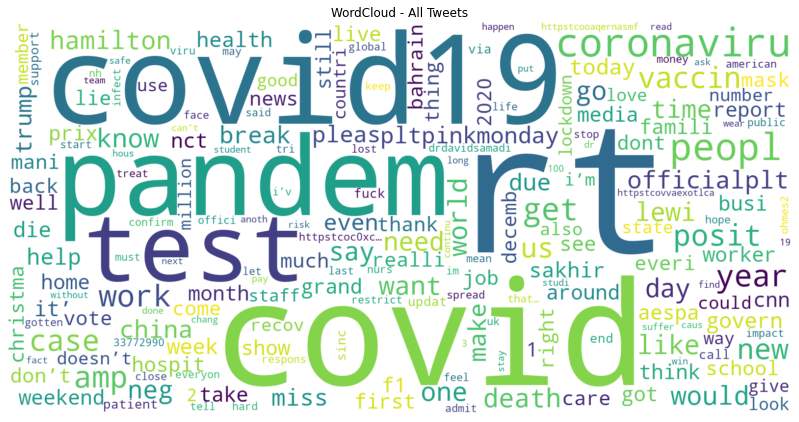

In [22]:
plot_wordcloud("WordCloud - All Tweets", bag_of_words)

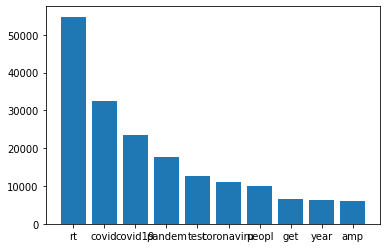

In [25]:
most_frequent = [k for k, v in sorted(bag_of_words.items(), key=lambda item: item[1], reverse = True)][:10]
frequency = []
for word in most_frequent:
    frequency.append(bag_of_words[word])

plt.bar(most_frequent, frequency)
plt.show()

### Search Engine building

In [21]:
%%time
index=defaultdict(list)
tf=defaultdict(list) #term frequencies of terms in documents (documents in the same order as in the main index)
df=defaultdict(int)         #document frequencies of terms in the corpus
titleIndex=defaultdict(str)
idf=defaultdict(float)
for i, row in df_tweets.iterrows():
    doc_id = i
    terms = row['processed_text']
    termDictDoc = {}
    for position, term in enumerate(terms): ## terms contains page_title + page_text
        try:
            # if the term is already in the dict append the position to the corrisponding list
            termDictDoc[term][doc_id].append(position) 
        except:
            # Add the new term as dict key and initialize the array of positions and add the position
            termDictDoc[term]=[doc_id, array('I',[position])] #'I' indicates unsigned int (int in python)
    norm=0
    for term, posting in termDictDoc.items(): 
        # posting is a list containing doc_id and the list of positions for current term in current document: 
        # posting ==> [currentdoc, [list of positions]] 
        # you can use it to inferr the frequency of current term.
        norm+=len(posting[1])**2
    norm=math.sqrt(norm)


    #calculate the tf(dividing the term frequency by the above computed norm) and df weights
    for term, posting in termDictDoc.items():     
        # append the tf for current term (tf = term frequency in current doc/norm)
        tf[term].append(np.round(len(posting[1])/norm,4))  ## SEE formula (1) above
        #increment the document frequency of current term (number of documents containing the current term)
        df[term]+= 1  # increment df for current term
        
    #merge the current page index with the main index
    for termpage, postingpage in termDictDoc.items():
        index[termpage].append(postingpage)
            
# Compute idf following the formula (3) above. HINT: use np.log
for term in df:
    idf[term] = np.round(np.log(float(len(df_tweets)/df[term])),4)
            

Wall time: 28.1 s


In [23]:
#Save index, tf, idf,df so we can use it in other notebooks.
pickle.dump( index, open( "index.p", "wb" ) )
pickle.dump( tf, open( "tf.p", "wb" ) )
pickle.dump( idf, open( "idf.p", "wb" ) )
pickle.dump( df, open( "df.p", "wb" ) )


In [5]:
index = pickle.load( open( "index.p", "rb" ) )
tf = pickle.load( open( "tf.p", "rb" ) )
idf = pickle.load(open( "idf.p", "rb" ) )
df =pickle.load( open( "df.p", "rb" ) )

In [11]:
def rankDocuments(terms, docs, index, idf, tf,tweets):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    titleIndex -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """
        
    # I'm interested only on the element of the docVector corresponding to the query terms 
    # The remaing elements would became 0 when multiplied to the queryVector
    docVectors=defaultdict(lambda: [0]*len(terms)) # I call docVectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    queryVector=[0]*len(terms)    
    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for queryVector
    query_norm = la.norm(list(query_terms_count.values()))
    for termIndex, term in enumerate(terms): #termIndex is the index of the term in the query
        if term not in index:
            continue
        ## Compute tf*idf(normalize tf as done with documents)
        queryVector[termIndex]=query_terms_count[term]/query_norm * idf[term]
        
        # Generate docVectors for matching docs
        for docIndex, (doc, postings) in enumerate(index[term]):
            # Example of [docIndex, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....
            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                docVectors[doc][termIndex]=tf[term][docIndex] * idf[term]  # TODO: check if multiply for idf

    # calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine siilarity
    # see np.dot
    
    docScores=[ [np.dot(curDocVec, queryVector), doc] for doc, curDocVec in docVectors.items() ]
    docScores.sort(reverse=True)
    resultDocs=[x[1] for x in docScores]
    #print document titles instead if document id's
    #resultDocs=[ titleIndex[x] for x in resultDocs ]
    if len(resultDocs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)    
    #print ('\n'.join(resultDocs), '\n')
    return resultDocs

In [6]:
def rankDocumentsOurScore(terms, docs, index, idf, tf,tweets):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    titleIndex -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """
        
    # I'm interested only on the element of the docVector corresponding to the query terms 
    # The remaing elements would became 0 when multiplied to the queryVector
    docVectors=defaultdict(lambda: [0]*len(terms)) # I call docVectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    queryVector=[0]*len(terms)    
    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for queryVector
    query_norm = la.norm(list(query_terms_count.values()))
    for termIndex, term in enumerate(terms): #termIndex is the index of the term in the query
        if term not in index:
            continue
        ## Compute tf*idf(normalize tf as done with documents)
        queryVector[termIndex]=query_terms_count[term]/query_norm * idf[term]
        
        # Generate docVectors for matching docs
        for docIndex, (doc, postings) in enumerate(index[term]):
            # Example of [docIndex, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....
            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                docVectors[doc][termIndex]=tf[term][docIndex] * idf[term]  # TODO: check if multiply for idf

    # calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine siilarity
    # see np.dot
    
    docScores=[ [np.dot(curDocVec, queryVector) + tweets.loc[doc,'retweet_count']+tweets.loc[doc,'favorite_count']+tweets.loc[doc,'reply_count'], doc] for doc, curDocVec in docVectors.items() ]
    docScores.sort(reverse=True)
    resultDocs=[x[1] for x in docScores]
    #print document titles instead if document id's
    #resultDocs=[ titleIndex[x] for x in resultDocs ]
    if len(resultDocs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)    
    #print ('\n'.join(resultDocs), '\n')
    return resultDocs

In [7]:
def getTerms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.
    
    Argument:
    line -- string (text) to be preprocessed
    
    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """
        
    stemming = PorterStemmer()
    stops = set(stopwords.words("english"))
    ## START CODE
    line=  line.lower() ## Transform in lowercase
    line=  line.split() ## Tokenize the text to get a list of terms
    line=[word for word in line if not word in stops]  ##eliminate the stopwords (HINT: use List Comprehension)
    line=[stemming.stem(word) for word in line] ## perform stemming (HINT: use List Comprehension)
    ## END CODE
    return line

In [8]:
def search_tf_idf(query, index, tweets):
    '''
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    '''
    query=getTerms(query)
    docs=set()
    for term in query:
        try:
            # store in termDocs the ids of the docs that contain "term"                        
            termDocs=[posting[0] for posting in index[term]]
            # docs = docs Union termDocs
            docs = docs.union(termDocs)
        except:
            #term is not in index
            pass
    docs=list(docs)
    ranked_docs = rankDocuments(query, docs, index, idf, tf, tweets)
    return ranked_docs

In [14]:
def search_our_score(query, index, tweets):
    '''
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    '''
    query=getTerms(query)
    docs=set()
    for term in query:
        try:
            # store in termDocs the ids of the docs that contain "term"                        
            termDocs=[posting[0] for posting in index[term]]
            # docs = docs Union termDocs
            docs = docs.union(termDocs)
        except:
            #term is not in index
            pass
    docs=list(docs)
    ranked_docs = rankDocumentsOurScore(query, docs, index, idf, tf, tweets)
    return ranked_docs

# TF-IDF SEARCH TEST

In [15]:

print("Insert your query:\n")
query = input()
ranked_docs = search_tf_idf(query, index,df_tweets)    
top = 10

print("\n======================\nTop {} results out of {} for the seached query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top] :
    print('-------------------------------------')
    print('Tweet: ' + df_tweets.loc[d_id,'text'])
    print('User: ' + df_tweets.loc[d_id,'user'])
    print('Date: ' +  df_tweets.loc[d_id,'created_at'])
    print('Likes: ' + str(df_tweets.loc[d_id,'favorite_count']))
    print('Retweets: ' + str(df_tweets.loc[d_id,'retweet_count']))
    if type(df_tweets.loc[d_id,'URL']) != str:
        print('No URL available')
    else:
        print('URL: ' + str(df_tweets.loc[d_id,'URL']))


Insert your query:

computer science

Top 10 results out of 699 for the seached query:

-------------------------------------
Tweet: Computer, show me the most 2020 event.
User: An Aggressive Goose
Date: Tue Dec 01 08:42:15 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: What Comes Next for the COVID-19 Computing Consortium https://t.co/UmA9ELCxF5
User: Christian Giaretta
Date: Tue Dec 01 08:18:29 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/UmA9ELCxF5
-------------------------------------
Tweet: Incredible advances to medical science powered by AI.
While this develops, if you want to collaborate and have some spare compute resources you can join Folding@Home at https://t.co/0VFdEr3KuO
#ProteinFolding #AI 
https://t.co/2BktKonwzj
User: Juan Rüsch
Date: Tue Dec 01 09:06:56 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/BZXE4K3TFi
-------------------------------------
Tweet: But who needs science.
User: KEITH MARTIN HEAVEN 3.5%
Date: 

# OUR SCORE SEARCH TEST

In [16]:
print("Insert your query:\n")
query = input()
ranked_docs = search_our_score(query, index,df_tweets)    
top = 10

print("\n======================\nTop {} results out of {} for the seached query:\n".format(top, len(ranked_docs)))
for d_id in ranked_docs[:top] :
    print('-------------------------------------')
    print('Tweet: ' + df_tweets.loc[d_id,'text'])
    print('User: ' + df_tweets.loc[d_id,'user'])
    print('Date: ' +  df_tweets.loc[d_id,'created_at'])
    print('Likes: ' + str(df_tweets.loc[d_id,'favorite_count']))
    print('Retweets: ' + str(df_tweets.loc[d_id,'retweet_count']))
    if type(df_tweets.loc[d_id,'URL']) != str:
        print('No URL available')
    else:
        print('URL: ' + str(df_tweets.loc[d_id,'URL']))


Insert your query:

computer science

Top 10 results out of 699 for the seached query:

-------------------------------------
Tweet: Computer, show me the most 2020 event.
User: An Aggressive Goose
Date: Tue Dec 01 08:42:15 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: What Comes Next for the COVID-19 Computing Consortium https://t.co/UmA9ELCxF5
User: Christian Giaretta
Date: Tue Dec 01 08:18:29 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/UmA9ELCxF5
-------------------------------------
Tweet: Incredible advances to medical science powered by AI.
While this develops, if you want to collaborate and have some spare compute resources you can join Folding@Home at https://t.co/0VFdEr3KuO
#ProteinFolding #AI 
https://t.co/2BktKonwzj
User: Juan Rüsch
Date: Tue Dec 01 09:06:56 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/BZXE4K3TFi
-------------------------------------
Tweet: But who needs science.
User: KEITH MARTIN HEAVEN 3.5%
Date: 